In [13]:

import os
from pathlib import Path
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
from plot_utils import fig_setup, finalize
from sklearn import datasets

DATA_DIR = Path(os.getcwd()) / "data"

# Regression example

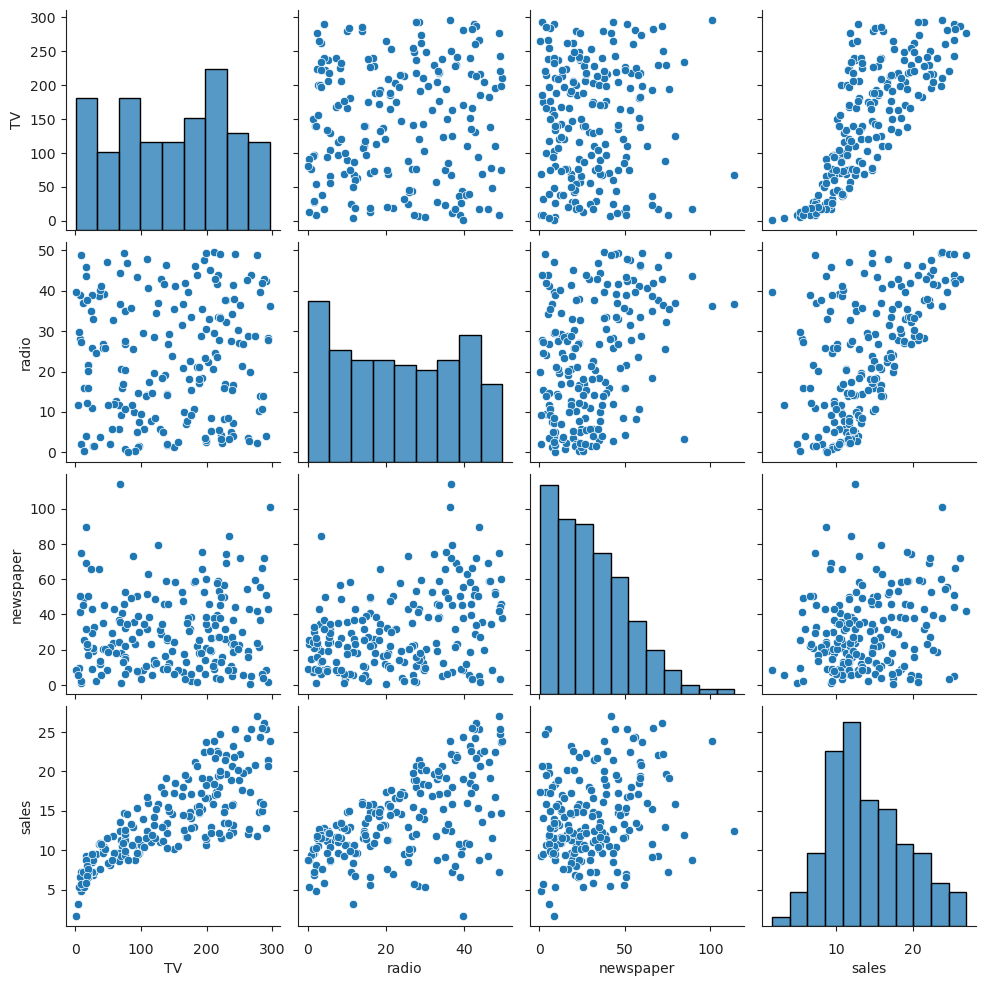

In [4]:
# Load and plot the data
TV = "TV"
RADIO = "radio"
NEWSPAPER = "newspaper"
SALES = "sales"

inputs = [TV, RADIO, NEWSPAPER]
df = pd.read_csv(DATA_DIR / "Advertising.csv", usecols=inputs+[SALES])

_ = sns.pairplot(df)

In [5]:
# Fit linear regression model
# Linear regression documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html
model = LinearRegression()
_=model.fit(df[inputs], df[SALES])

# Coefficients of inputs and intercept term
print(
    f"Linear regressiong intercept = {round(model.intercept_, 4)} and "
    f"coefficients = {[round(float(coef), 4) for coef in model.coef_]}"
)

# Predict on new x
x_new = [1, 1, 1]
pred = model.predict(pd.DataFrame([x_new], columns=inputs))
print(f"For new x = {x_new}, predicted y is {round(pred[0], 4)}")

Linear regressiong intercept = 2.9389 and coefficients = [0.0458, 0.1885, -0.001]
For new x = [1, 1, 1], predicted y is 3.1721


In [6]:
# Fit ridge regression model
# Ridge regression documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
model = Ridge(alpha=0.00001)
_=model.fit(df[inputs], df[SALES])

# Coefficients of inputs and intercept term
print(
    f"Ridge regression intercept = {round(model.intercept_, 4)} and "
    f"coefficients = {[round(float(coef), 4) for coef in model.coef_]}"
)

# Predict on new x
x_new = [1, 1, 1]
pred = model.predict(pd.DataFrame([x_new], columns=inputs))
print(f"For new x = {x_new}, predicted y is {round(pred[0], 4)}")

Ridge regression intercept = 2.9389 and coefficients = [0.0458, 0.1885, -0.001]
For new x = [1, 1, 1], predicted y is 3.1721


In [7]:
# Fit ridge regression model
# Ridge regression documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
model = Lasso(alpha=1.0)
_=model.fit(df[inputs], df[SALES])

# Coefficients of inputs and intercept term
print(
    f"Ridge regression intercept = {round(model.intercept_, 4)} and "
    f"coefficients = {[round(float(coef), 4) for coef in model.coef_]}"
)

# Predict on new x
x_new = [1, 1, 1]
pred = model.predict(pd.DataFrame([x_new], columns=inputs))
print(f"For new x = {x_new}, predicted y is {round(pred[0], 4)}")

Ridge regression intercept = 3.0402 and coefficients = [0.0457, 0.1835, 0.0]
For new x = [1, 1, 1], predicted y is 3.2693


# Overfitting

/Users/erjo3868/repos/swe4s/lectures/data-science/plot_utils.py:108: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


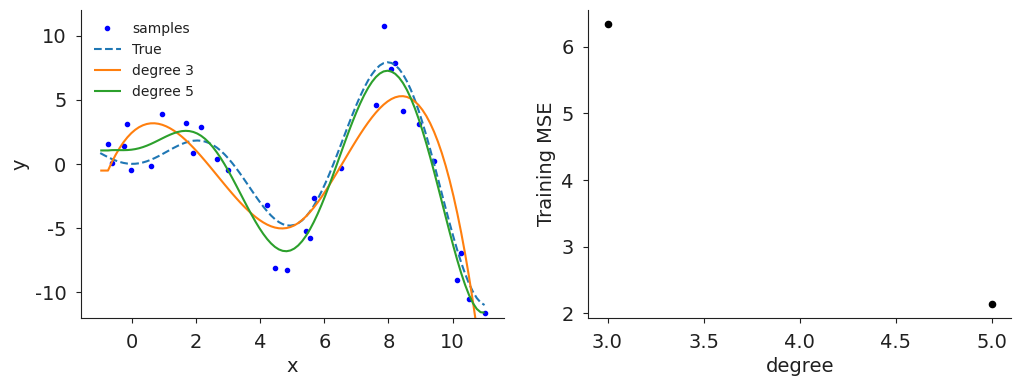

In [8]:
np.random.seed(42)
def true_f(x):
    """Function to be approximated by polynomial interpolation."""
    return x * np.sin(x)

def mse(pred, true):
    return (1/len(pred))*sum((pred-true)**2)

# Full range 
noise_sd = 2
xmin, xmax = -1, 11
N = 30
full_x = np.linspace(xmin, xmax, 100)

# Sample from full range
rng = np.random.RandomState(0)
x_sample = np.sort(rng.choice(full_x, size=N, replace=False))
df = pd.DataFrame({
    "x": x_sample,
    "y": true_f(x_sample) + np.random.normal(scale=noise_sd, size=N)
})

# Plot true f and samples
_, axs = fig_setup(1, 2)
_=axs[0].plot(df["x"], df["y"], 'b.', label="samples")
_=axs[0].plot(full_x, true_f(full_x), '--', label="True")


# polynomial features
training_mse = []
for degree in [3, 5]:
    model = make_pipeline(SplineTransformer(n_knots=degree, degree=degree), LinearRegression())
    # model = make_pipeline(SplineTransformer(n_knots=5, degree=degree), LinearRegression())
    # model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1e-3))
    _=model.fit(df.loc[:,"x":"x"], df["y"])
    y_plot = model.predict(pd.DataFrame({"x": full_x}).loc[:,"x":"x"])
    _=axs[0].plot(full_x, y_plot, label=f"degree {degree}")

    # Calculate MSE
    y_pred = model.predict(df.loc[:,"x":"x"])
    training_mse.append([degree, mse(pred=y_pred, true=df["y"])])
training_mse = pd.DataFrame(training_mse, columns=["degree", "train_mse"])

# Plots
_=axs[0].legend()
_=axs[0].set_ylim(-12, 12)
_, _ = axs[0].set_xlabel("x"), axs[0].set_ylabel("y")

_=training_mse.plot.scatter("degree", "train_mse", c="black", ax=axs[1])
_ = axs[1].set_ylabel("Training MSE")
finalize(axs)



# K-NN on Iris data

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()

# Create a dataframe from the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  